### IMPORTING REQUIRED LIBRARIES:

In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
data.shape

(18278, 104)

In [4]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


## EXTRACTING CERTAIN COLUMNS:

In [5]:
data.describe().columns #numeric variables 

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [6]:
data = data[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]


In [7]:
data.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8


In [8]:
data = data[data.overall > 87] # extracting players with overall above 87
data

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,...,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,...,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,200000,3,3,...,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,340000,4,4,...,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,240000,3,3,...,77,91,38,43,41,14,14,9,11,14


In [9]:
pd.set_option('display.max_rows',65)
data.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          13
pace                           9
shooting                       9
passing                        9
dribbling                      9
defending                      9
physic                         9
gk_diving                     31
gk_handling                   31
gk_kicking                    31
gk_reflexes                   31
gk_speed                      31
gk_positioning                31
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

In [10]:
pd.set_option('display.max_rows',105)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  40 non-null     object 
 1   age                         40 non-null     int64  
 2   height_cm                   40 non-null     int64  
 3   weight_kg                   40 non-null     int64  
 4   overall                     40 non-null     int64  
 5   potential                   40 non-null     int64  
 6   value_eur                   40 non-null     int64  
 7   wage_eur                    40 non-null     int64  
 8   international_reputation    40 non-null     int64  
 9   weak_foot                   40 non-null     int64  
 10  skill_moves                 40 non-null     int64  
 11  release_clause_eur          40 non-null     float64
 12  team_jersey_number          40 non-null     float64
 13  contract_valid_until        40 non-nu

In [11]:
data.select_dtypes(include=['float64'])

,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN
1,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN
2,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN
3,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0
4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN
5,166500000.0,17.0,2023.0,7.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN
6,143400000.0,1.0,2022.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0
7,150200000.0,4.0,2023.0,4.0,77.0,60.0,70.0,71.0,90.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN
8,92300000.0,10.0,2020.0,NaN,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN
9,148900000.0,11.0,2023.0,10.0,93.0,86.0,81.0,89.0,45.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.corr()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
age,1.000000,0.107242,0.048912,0.058260,-0.527522,-0.693526,0.204380,0.547521,-0.155196,-0.125079,...,0.101773,0.121770,0.223649,0.179748,0.186368,-0.065842,-0.047097,-0.052528,-0.051844,-0.028428
height_cm,0.107242,1.000000,0.876306,-0.274329,-0.163989,-0.414502,-0.454164,-0.058552,-0.275849,-0.622066,...,-0.527072,-0.546178,-0.040940,-0.130451,-0.050947,0.512770,0.523320,0.534618,0.533449,0.527459
weight_kg,0.048912,0.876306,1.000000,-0.170082,-0.006190,-0.327726,-0.403572,-0.121283,-0.334702,-0.702839,...,-0.591705,-0.593018,-0.099567,-0.180692,-0.106063,0.566637,0.580138,0.587911,0.596469,0.574432
overall,0.058260,-0.274329,-0.170082,1.000000,0.678996,0.557638,0.635627,0.401877,0.314444,0.272466,...,0.160729,0.397886,-0.153698,-0.108094,-0.114755,-0.129789,-0.109853,-0.105695,-0.088498,-0.125258
potential,-0.527522,-0.163989,-0.006190,0.678996,1.000000,0.710723,0.239522,-0.081076,0.225901,0.189790,...,-0.069310,0.102753,-0.263256,-0.194256,-0.197217,0.027906,0.029057,0.041969,0.062118,0.007918
value_eur,-0.693526,-0.414502,-0.327726,0.557638,0.710723,1.000000,0.351491,-0.059639,0.487396,0.490056,...,0.299869,0.383794,-0.211892,-0.147306,-0.178802,-0.261104,-0.263921,-0.262568,-0.250400,-0.287161
wage_eur,0.204380,-0.454164,-0.403572,0.635627,0.239522,0.351491,1.000000,0.578245,0.369570,0.491219,...,0.534556,0.632303,0.066668,0.127136,0.051399,-0.414182,-0.399381,-0.387475,-0.394036,-0.402067
international_reputation,0.547521,-0.058552,-0.121283,0.401877,-0.081076,-0.059639,0.578245,1.000000,0.247450,0.274164,...,0.421696,0.321881,-0.046721,-0.029379,-0.040170,-0.154852,-0.145256,-0.138389,-0.130110,-0.133933
weak_foot,-0.155196,-0.275849,-0.334702,0.314444,0.225901,0.487396,0.369570,0.247450,1.000000,0.544688,...,0.507569,0.499384,-0.009760,0.029690,-0.038924,-0.415793,-0.416676,-0.350383,-0.407345,-0.428902
skill_moves,-0.125079,-0.622066,-0.702839,0.272466,0.189790,0.490056,0.491219,0.274164,0.544688,1.000000,...,0.861415,0.804929,0.047897,0.172155,0.095921,-0.781407,-0.783541,-0.782471,-0.778170,-0.786520


In [13]:
cor_matrix = data.corr().abs()
print(cor_matrix)

                                 age  height_cm  weight_kg   overall  \
age                         1.000000   0.107242   0.048912  0.058260   
height_cm                   0.107242   1.000000   0.876306  0.274329   
weight_kg                   0.048912   0.876306   1.000000  0.170082   
overall                     0.058260   0.274329   0.170082  1.000000   
potential                   0.527522   0.163989   0.006190  0.678996   
value_eur                   0.693526   0.414502   0.327726  0.557638   
wage_eur                    0.204380   0.454164   0.403572  0.635627   
international_reputation    0.547521   0.058552   0.121283  0.401877   
weak_foot                   0.155196   0.275849   0.334702  0.314444   
skill_moves                 0.125079   0.622066   0.702839  0.272466   
release_clause_eur          0.706741   0.392364   0.295917  0.554853   
team_jersey_number          0.253844   0.246738   0.201392  0.023311   
contract_valid_until        0.536607   0.027066   0.081430  0.06

In [14]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                            age  height_cm  weight_kg   overall  potential  \
age                         NaN   0.107242   0.048912  0.058260   0.527522   
height_cm                   NaN        NaN   0.876306  0.274329   0.163989   
weight_kg                   NaN        NaN        NaN  0.170082   0.006190   
overall                     NaN        NaN        NaN       NaN   0.678996   
potential                   NaN        NaN        NaN       NaN        NaN   
value_eur                   NaN        NaN        NaN       NaN        NaN   
wage_eur                    NaN        NaN        NaN       NaN        NaN   
international_reputation    NaN        NaN        NaN       NaN        NaN   
weak_foot                   NaN        NaN        NaN       NaN        NaN   
skill_moves                 NaN        NaN        NaN       NaN        NaN   
release_clause_eur          NaN        NaN        NaN       NaN        NaN   
team_jersey_number          NaN        NaN        NaN       NaN 

In [15]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)



['release_clause_eur', 'attacking_finishing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'power_shot_power', 'power_long_shots', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']


### REPLACE NULL VALUES WITH MEAN:

In [16]:
data = data.fillna(data.mean())

In [17]:
data.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attackin

In [18]:
names = data.short_name.tolist() # saving names for late

data = data.drop(['short_name'], axis = 1) # drop the short_name column


In [19]:
data

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8
5,28,181,70,91,91,90000000,370000,4,5,4,...,79,91,68,58,51,15,13,5,10,13
6,27,187,85,90,93,67500000,250000,3,4,1,...,25,70,25,13,10,88,85,88,88,90
7,27,193,92,90,91,78000000,200000,3,3,2,...,62,89,91,92,85,13,10,13,11,11
8,33,172,66,90,90,45000000,340000,4,4,4,...,82,92,68,76,71,13,9,7,14,9
9,27,175,71,90,90,80500000,240000,3,3,4,...,77,91,38,43,41,14,14,9,11,14


## RESCALE THE DATA:

In [20]:
x = data.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

## Use PCA to reduce 60 columns into 2

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

### Using KMeans cluustering

In [22]:
# specify the number of clusters
kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()


## Make a new data frame by adding players' names and their cluster

In [23]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.658145,-1.189985,1,L. Messi
1,-1.306317,-0.696545,1,Cristiano Ronaldo
2,-1.484600,-1.355175,1,Neymar Jr
3,2.860006,-0.700302,2,J. Oblak
4,-1.334722,-1.099146,1,E. Hazard


In [24]:
from sklearn.metrics import silhouette_score

In [25]:
sil_score= silhouette_score(x,kmeans.labels_)
sil_score

-0.1721001650086203

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


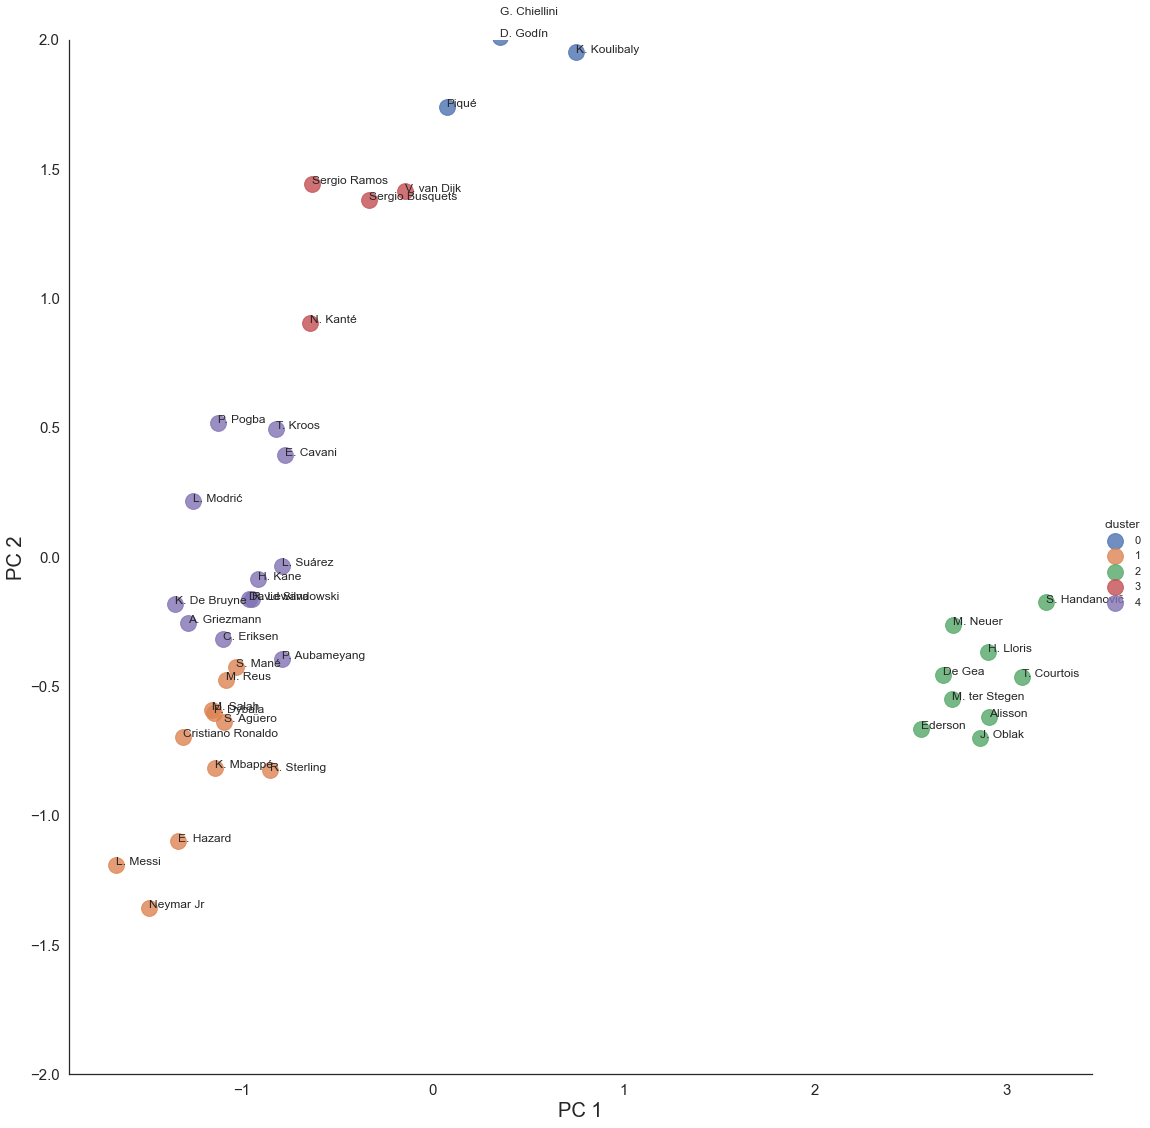

In [27]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()